<a href="https://colab.research.google.com/github/KiykoHanna/Stepik-DeepLearning/blob/main/%5Bproject%5Dobject_detection_spring_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=500></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h1 style="text-align: center;"><b>Object detection</b></h1>

### Руководитель проекта:
* Юрий Яровиков (AIRI, МФТИ) | tg:@yu_rovikov

<h1 style="text-align: center;"><b>Треки на проекте</b></h1>
На этом проекте есть два возможных трека, из которых нужно выбрать один.

* **Первый трек --- исследовательский**. На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо будет попробовать несколько моделей детекции, самостоятельно реализовать метрики.

* **Второй трек --- продуктовый**. На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Вам необходимо выбрать основной сценарий, по которому вы пойдете, указав это при сдаче работы. При этом, никто не мешает вам совместить два трека, проведя и моделирование, и встраивание в демо. В этом случае мы рекомендуем пойти по **плану из второго трека**, а за моделирование будут ставиться бонусные баллы.

Обратите внимание, что суммарный балл по проекту не может превышать 10. Максимальный балл можно получить на любом из двух треков.

# Исследовательский трек
На этом треке вам предстоит самостоятельно обучить и протестировать предобученную модель детекции. Основной упор делается на моделирование и обучение. Необходимо попробовать несколько моделей детекции и провести их объективное сравнение в соответствии с целевой метрикой проекта.

## План работы




### 1. Выбор фреймворка/библиотеки для использования детектора (1 балл)

Чтобы освежить память о задаче детекции, можно посмотреть [занятия на продвинутом курсе](https://stepik.org/lesson/458312/step/1?unit=616130).

В выборе фреймворка предоставляется свобода, лично я рекомендовал бы один из:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

**Обратите внимание, что для получения полного балла по проекту необходимо обучить и сравнить как минимум две различные модели детекции (можно из одного фреймворка)!**


In [1]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

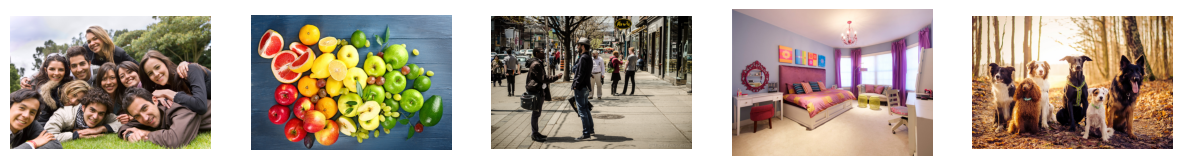

In [2]:
!wget http://studylab.ru/upload/wisywig/drag-n-drop/summer.jpg -q -O input1.jpg
!wget https://3d-linker.ru/components/com_jshopping/files/img_products/full_Fruit_Lemons_Apples_Avocado_Grapes_Grapefruit_Wood_535746_5716x3840.jpg -q -O input2.jpg
!wget https://theweeklyminute.files.wordpress.com/2014/07/dsc0004-4.jpg -q -O input3.jpg
!wget https://obschestvennaya-banya-72.ru/wp-content/uploads/1/1/d/11d8b6efba4d8a61ad1aca4196d663d6.jpeg -q -O input4.jpg
!wget https://s1.1zoom.ru/big0/879/420617-Kycb.jpg -q -O input5.jpg
im = []
fig = plt.figure(figsize=(15,5))
for i in range(5):

  im.append(cv2.imread("/content/input" + str(i + 1)+ ".jpg")[:,:,::-1])
  plt.subplot(1, 5, i+1)
  plt.axis("off")
  plt.imshow(im[i])


# FasterRCNN_ResNet50_FPN_V2

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:02<00:00, 80.6MB/s]


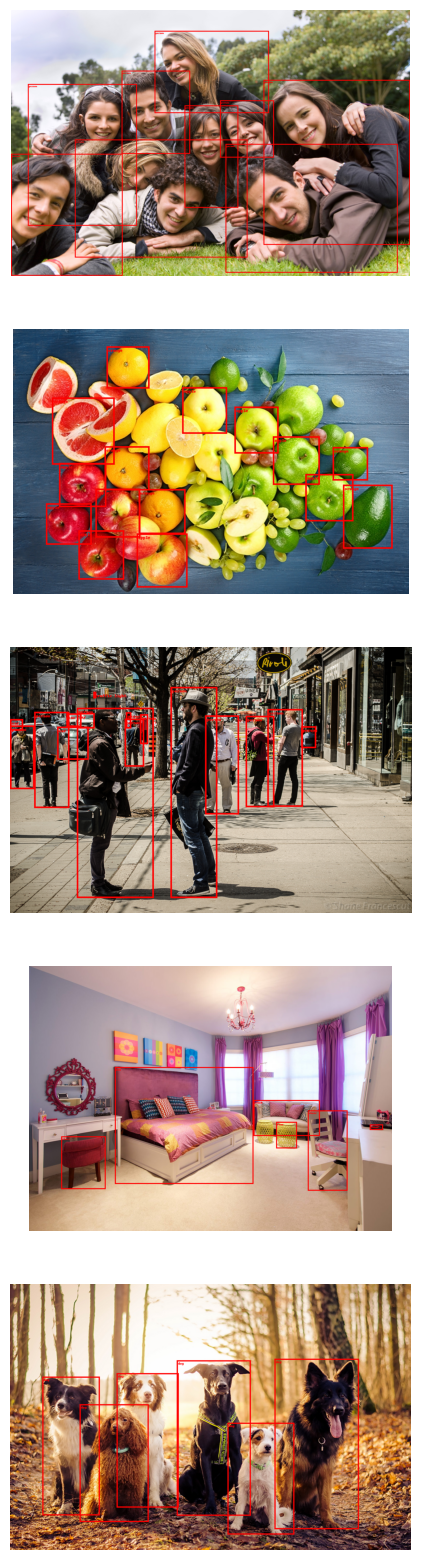

In [3]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# Step 0: Reads a JPEG image into a 3 dimensional RGB or grayscale Tensor. Optionally converts the image to the desired format. The values of the output tensor are uint8 in [0, 255].
img = []
for i in range(len(im)):
  img.append((read_image("/content/input" + str(i + 1)+ ".jpg")))


# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()


fig = plt.figure(figsize=(15,20))
for i in range(len(im)):

# Step 3: Apply inference preprocessing transforms
  batch = [preprocess(img[i])]

# Step 4: Use the model and visualize the prediction
  prediction = model(batch)[0]
  labels = [weights.meta["categories"][i] for i in prediction["labels"]]
  box = draw_bounding_boxes(img[i],
                          boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4)
  im_box = to_pil_image(box.detach())
  plt.subplot(len(im), 1, i+1)
  plt.axis("off")
  plt.imshow(im_box)


# DETECTRON2

In [4]:
!python -m pip install pyyaml==5.3.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp310-cp310-linux_x86_64.whl size=44636 sha256=6ce40dc5220fe276414de181fbc96b7c09ef25875f3ca5950db934a6b4177bbb
  Stored in directory: /root/.cache/pip/wheels/0b/a9/6a/d0a6981a8dbb698845178818642f72ce179f14336908c7df01
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flax 0.6.11 requires PyYAML>=5.4.1, but you have pyyaml 5.3.1 which is incompatible.
Cloning into 'detectron2'...
remote: Enumerating objects: 15124, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (95/95), done.
remote: T

In [6]:
import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


In [7]:
# Some basic setup:
# Setup detectron2 logger
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import json, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [8]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

outputs = []
for i in range(len(im)):
  outputs.append(predictor(im[i]))

[06/29 12:15:23 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


model_final_f10217.pkl: 178MB [00:00, 184MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


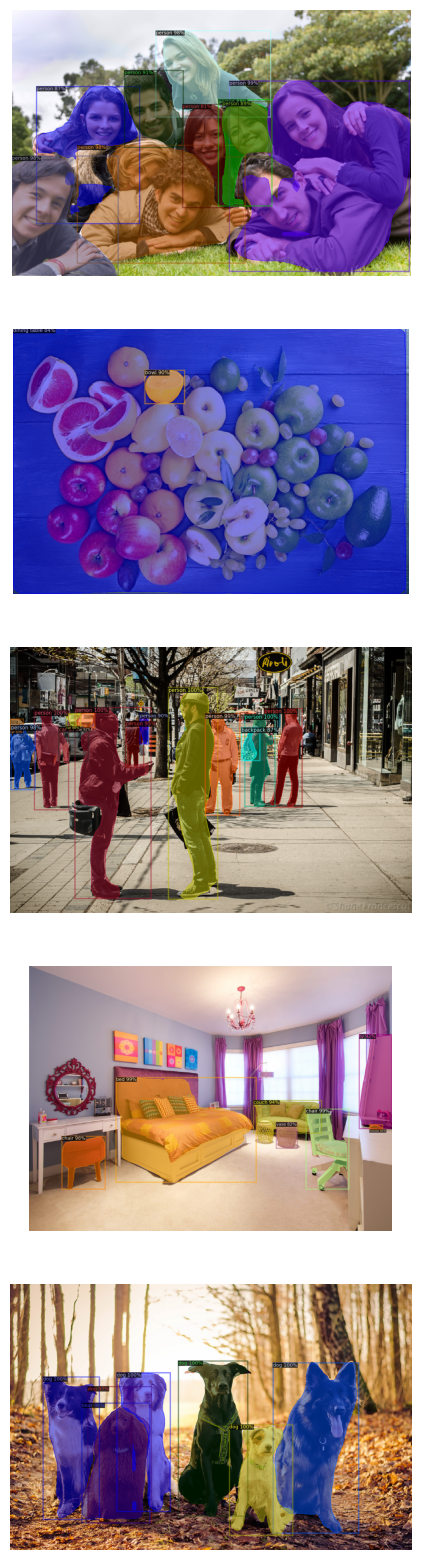

In [9]:
fig = plt.figure(figsize=(15,20))
for i in range(len(im)):
  v = Visualizer(im[i], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)

  out = v.draw_instance_predictions(outputs[i]["instances"].to("cpu"))
  plt.subplot(len(im), 1, i+1)
  plt.axis("off")
  plt.imshow(out.get_image())

### 2. Запуск детектора на случайных изображениях (1 балл)

В этом пункте вам необходимо применить модель детектирования в выбранном выше репозитории (по сути проверить, что инференс в модели работает). Таким образом, вы убедитесь, что модель работает, и сможет переходить к обучению.

> Результатом пункта явлется набор изображений, на которых модель успешно отработала и результат детекции виден и понятен.



### 3. Выбор датасета (0 баллов)

Вы можете выбрать любой датасет для детекции. Вот несколько идей:
1. [Детекция игровых карт](https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10): лежат в папке images вместе с разметкой;
2. [Детекция фруктов](https://www.kaggle.com/mbkinaci/fruit-images-for-object-detection): скачать можно, нажав на кнопку Download;
3. [Детекция одежды (Deep Fashion 2)](https://github.com/switchablenorms/DeepFashion2): стоит прочитать README на главной странице репозитория. Для получения датасета нужно запросить пароль у автора через гугл-форму. После скачивания распакуйте его с использованием пароля. Из файлов аннотаций нас будут интересовать только `bounding_box`, `category_name` и `category_id`;
4. [Детекция лиц (Wider Face)](http://shuoyang1213.me/WIDERFACE/): большой датасет для детектирования лиц самых разных размеров. Скачать можно прямо по ссылкам на сайте;
5. [Детекция лиц (Kaggle)](https://www.kaggle.com/dataturks/face-detection-in-images): в датасете достаточно мало данных, но можно попробовать, если датасеты выше показались неподходящими для Вас;
6. Датасет из любого соревновани по детекции на Kaggle.

При работе с датасетом вы неизбежно столкнетесь с работой с файлами и папками (директориями). Рекомендуется освежить в памяти работу с библиотеками `os`, `json`, `glob`. Может помочь [этот туториал](https://realpython.com/working-with-files-in-python/).

> Результатом выполнения пункта явлется загруженный датасет, состоящий из изображений и разметки к ним (bounding box'ов всех объектов на каждом изображении).

In [10]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download mbkinaci/fruit-images-for-object-detection

 49% 14.0M/28.4M [00:00<00:00, 143MB/s]
100% 28.4M/28.4M [00:00<00:00, 180MB/s]


In [11]:
!unzip /content/fruit-images-for-object-detection.zip

Archive:  /content/fruit-images-for-object-detection.zip
  inflating: test_zip/test/apple_77.jpg  
  inflating: test_zip/test/apple_77.xml  
  inflating: test_zip/test/apple_78.jpg  
  inflating: test_zip/test/apple_78.xml  
  inflating: test_zip/test/apple_79.jpg  
  inflating: test_zip/test/apple_79.xml  
  inflating: test_zip/test/apple_80.jpg  
  inflating: test_zip/test/apple_80.xml  
  inflating: test_zip/test/apple_81.jpg  
  inflating: test_zip/test/apple_81.xml  
  inflating: test_zip/test/apple_82.jpg  
  inflating: test_zip/test/apple_82.xml  
  inflating: test_zip/test/apple_83.jpg  
  inflating: test_zip/test/apple_83.xml  
  inflating: test_zip/test/apple_84.jpg  
  inflating: test_zip/test/apple_84.xml  
  inflating: test_zip/test/apple_85.jpg  
  inflating: test_zip/test/apple_85.xml  
  inflating: test_zip/test/apple_86.jpg  
  inflating: test_zip/test/apple_86.xml  
  inflating: test_zip/test/apple_87.jpg  
  inflating: test_zip/test/apple_87.xml  
  inflating: test_z

### Посмотрим на пример изображения с разметкой из нашего датасета

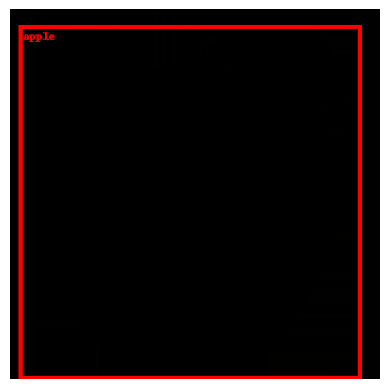

In [69]:
import xml.etree.ElementTree as ET

path_data_sample = ('/content/train_zip/train/apple_1.xml')
img_s = cv2.imread('/content/train_zip/train/apple_1.jpg')[:,:,::-1]

def transf_im(img_s):
  img = torch.from_numpy(img_s.astype('float32')).permute(2,0,1)
  img = img / 255.
  return torch.tensor(img,dtype=torch.uint8)

a = transf_im(img_s)

def from_xml_to_box(pass_xml):
  tree = ET.parse(pass_xml)
  root = tree.getroot()
  img_name = root[1].text
  labl = []
  box =[]
  for i in range(6, len(root)):
    labl.append(root[i][0].text)
    x_min = float(root[i][4][0].text)
    y_min = float(root[i][4][1].text)
    x_max = float(root[i][4][2].text)
    y_max = float(root[i][4][3].text)
    box.append([x_min, y_min, x_max, y_max])

  return({'boxes':torch.FloatTensor(box), 'labels':labl})
data_sample = from_xml_to_box(path_data_sample)

def show_sample(img, boxes, labels):
  box = draw_bounding_boxes(img,
                            boxes=boxes,
                            labels=labels,
                            colors="red",
                            width=4)
  im_box = to_pil_image(box.detach())
  plt.axis("off")
  plt.imshow(im_box)

show_sample(a, data_sample['boxes'], data_sample['labels'])

### 4. Предобработка данных (2 балла)

Самый непростой этап в этом сценарии. Скачать данные $-$ лишь половина дела. Чтобы обучить нейросеть на этих данных, нужно написать генератор батчей. Однако если будем подавать изображения так, как они есть, то даже батч собрать не сможем -- нужно привести их к однмоу размеру. Далее нужно привести их к типу float, переместить на CUDA и поделить значения в пикселях на 255 (подробнее см. [занятие](https://www.youtube.com/watch?v=XSPYe4-y4HE)). Также нужно настроить аугментации и постобработку.

То, как именно все это реализовать $-$ зависит от инструмента, выбранного в пункте 1. Например, в detectron2 в обучающих материалах описан формат данных для обучения. Возможно, нужно будет зайти в документацию и почитать более подробно, чтобы разобраться, какой именно нужен формат координат.

НЕ нужно копировать все файлы с картинками и разметкой прямо на диске в их предобработанные версии. Хороший тон $-$ осуществлять всю эту обработку программно, "на лету". Поможет [туториал](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) по написанию своего датасета на PyTorch.

> Результатом выполнения пункта явлется код, запуск которого ведет к подаче батчей правильного вида (разметка приведена к требуемому формату координат, изображения нужного типа, размера и поделены на 255 и т.д.) для обучения нейронной сети-детектора.

In [64]:
import torch
import torchvision
from torchvision import transforms, datasets, utils
import os
import pandas as pd
from skimage import io, transform
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion();

In [76]:
class FruitDataset(Dataset):
    """Fruit dataset."""

    def __init__(self, root_dir, transform=None):
        """
        Arguments:
            xml_file (string): Path to the xml file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.list_sampl = [i[:-3] for i in os.listdir(root_dir)]
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.boxes_and_labels['labels'])


    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        boxes_and_labels = from_xml_to_box(self.root_dir+ '/' + self.list_sampl[idx] + 'xml' )
        img_name = self.root_dir +  '/' + self.list_sampl[idx] + 'jpg'
        image = cv2.imread(img_name)

        if self.transform:
            image = self.transform(image)

        sample = {'image': image, 'boxes':boxes_and_labels['boxes'], 'labels':boxes_and_labels['labels']}



        return sample


In [77]:
fruit_dataset =FruitDataset(root_dir='/content/test_zip/test', transform=transf_im)


0 torch.Size([3, 547, 766]) torch.Size([2, 4]) ['banana', 'banana']


TypeError: ignored

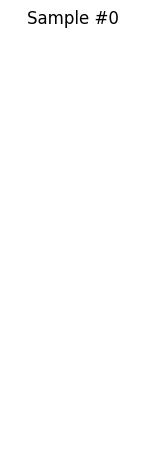

In [78]:
fig = plt.figure()

for i, sample in enumerate(fruit_dataset):
    print(i, sample['image'].shape, sample['boxes'].shape, sample['labels'])

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_sample(*sample)

    if i == 3:
        plt.show()
        break

In [ ]:
from detectron2.structures import BoxMode

def get_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}

        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]

        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "val"]:
    DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
    MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
balloon_metadata = MetadataCatalog.get("balloon_train")

### 5. Обучение моделей-детекторов (3 балла)

Необходимо написать цикл обучения на PyTorch самостоятельно -- это основной критерий в этом пункте. Необходимо обучить обе выбранные модели.

> Результатом выполнения пункта явлется код, запуск которого ведет к обучению модели на выбранном датасете. При обучении **обязательно выводить числовые значения лосса на трейне и валидации**, крайне желательно использовать [`TensorBoard`](https://pytorch.org/docs/stable/tensorboard.html) для визуализации. Обязательно также сохранять модель после каждой N-ой эпохи, чтобы потом ее качество можно было проверить и веса были переиспользуемыми.

### 6. Измерение качества работы модели (метрики согласуются с руководителем и зависят от задачи) (2 балла)

Под метриками понимаются функции/формулы, по которым оценивается качество модели-детектора. Обычно для измерения качества работы детектора используют поклассовые Precision, Recall, F1-меру и mean Average Precision (mAP). Подробнее про них можно послушать в [видеолекции 2018 года](https://www.youtube.com/watch?v=ewkSI2cuyoQ&list=PL0Ks75aof3ThkitsZbUOEQg7Ybl5kB_s3&index=24).

**Необходимо самостоятельно реализовать требуемые метрики!**

> Результат пункта --- реализованные функции метрик для задачи детектирования, позволяющие оценить качество работы модели на выборке, а также оценка обеих обученных моделей по данным метрикам на test. Необходимо сделать вывод о том, какая модель сработала лучше и оценить полученный результат.

### 7. Поиск путей применения этой модели в бизнесе/реальных задачах/набросок встраивания в веб/мобильное демо (1 балл)

В этом пункте нужно подумать, как эта модель может быть использована в дальнейшем. То есть, например, зачем нужно детектировать фрукты? Или одежду?

> Результат пункта $-$ перечисленные кейсы использования модели (описанные **как можно подробнее**).

**IMPORTANT NOTE:** Обычно этим вопросом все же задаются до начала какой-либо разработки. Но поскольку проект носит учебный/исследовательский характер, допустимо говорить об этом в конце

# Продуктовый трек

На этом треке вам не понадобится обучать свою модель детекции (хотя никто не запрещает вам это делать), но необходимо, во-первых, продумать **продуктовую составляющую проекта** (проблема людей, которая решается в данном проекте, целевая аудитория продукта, оптимальный способ внедрения модели), а также создать [MVP](https://ru.wikipedia.org/wiki/%D0%9C%D0%B8%D0%BD%D0%B8%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE_%D0%B6%D0%B8%D0%B7%D0%BD%D0%B5%D1%81%D0%BF%D0%BE%D1%81%D0%BE%D0%B1%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82) , **внедрив модель детекции в цифровой сервис**, который может быть реализован как Telegram-бот, Web-демо, Desktop-приложение.

Ваша модель не обязательно должна содержать в себе лишь детекцию: например, существуют составные модели, которые осуществляют детекцию лиц на фотографии и определяют их настроение/возраст. Такие модели тоже можно и даже желательно использовать, если того требует проект. Единственное требование --- чтобы детекция присутствовала в качестве основной/вспомогательной задачи.

Если у Вас есть опыт веб- или мобильной разработки, можете работать в рамках привычных Вам инструментов. Главное, чтобы в итоге они позволяил встроить в себя нейросетевой детектор, на вход которому будут поступать картинки.

Изображения на вход демо могут поступать с веб-камеры, из файлов, по ссылке или с камеры мобильного телефона -- способ должен вытекать из предполагаемого сценария применения вашего продукта. Демо должно показывать, что детектор успешно отрабатывает на поданных изображениях и находит нужные объекты.

## План работы

### 1. Поиск проблемы и описание решения (2 балла)
В этом пункте необходимо сформулировать проблему реального мира и продумать, как именно она будет решаться с помощью вашего продукта.

#### Как должен быть устроен ваш продукт
Здесь мы не будем подробно обсуждать, как создавать IT-продукты, которые будут пользоваться широким спросом и способны генерировать выручку. Но кратко опишем!

1. **Ваш продукт должен решать существующую проблему**. Исследования показывают, что это основная причина провала стартапов --- решение не существующей проблемы. О том, как создать стартап, который решает реальную проблему пользователя, можно прочитать [здесь](https://stfalcon.com/ru/blog/post/startups-solving-user-problems). Также есть отличная книжка "Спроси маму", которую необходимо прочитать любому человеку, который создает свой продукт.

2. **Ваш продукт должен иметь целевую аудиторию**. Этот пункт увязан с предыдущим. Если у продукта нет целевой аудитории, его никто не будет использовать.

3. **Ваш продукт должен быть оформлен в сервис, подходящий для основного сценария использования продукта и целевой аудитории**. Предположим, например, что вы делаете цифровой сервис для распознавания языка жестов. Как может выглядеть такой продукт и в какой сервис он может быть внедрён? Например, если создать ТГ-бота, который будет детектировать и распознавать жест по фотографии, его довольно сложно будет использовать, потому что каждый жест в отдельности сфотографировать нельзя. Оптимальным решением в этом случае было бы мобильное приложение с потоковым детектированием жеста на видео и автоматическим добавлением субтитров. При этом именно такой продукт может быть слишком сложен в реализации. Тогда необходимо выбрать оформление сервиса, которое будет осмысленно с продуктовой точки зрения и которое вы при этом сможете реализовать.

#### Как искать проблему
Есть много способов найти важную и актуальную проблему. Некоторые советы перечислены в книге "Спроси маму". Несколько коротких советов можно найти [здесь](https://vc.ru/life/1735-startup-ideas).
* Можно подумать о темах, которые близки лично вам/вашим знакомым. Если проект решает проблему даже узкой целевой аудитории, это не страшно.
* Можно найти уже существующий проект и улучшить его, обозначив, в чем преимущество вашего решения перед конкурентами.
* У человечества вообще много глобальных [проблем](https://www.un.org/sustainabledevelopment/ru/sustainable-development-goals/), над которыми борются различные мировые организации. Если ваш проект способен хоть в каком-то частном случае продвинуться к решению этих проблем, это уже будет отлично.
* Для поиска идей можно использовать датасеты с kaggle.

> Результат пункта -- подробное описание проблемы, которую вы решаете, целевая аудитория использования продукта, а также **подробное** описание сервиса, который предлагается создать. Допускается описать "идеальный продукт", а затем создать MVP, имеющий отклонения от оптимального варианта, сославшись на ограниченное время/ресурсы для выполнения проекта. Но тогда это необходимо отдельно упомянуть в этом пункте.

### 2. Поиск обученной модели и датасета (1 балл)

В этом пункте вам необходимо выбрать модель, которую вы встроите в ваш продукт, и датасет, на котором вы эту модель будете тестировать.

* Если вы найдете готовую модель, которую можно применить для вашей задачи, можно просто взять её. В этом случае с датасетом можно особо не заморачиваться. Достаточно в этом пункте запустить ваш детектор на нескольких (5-7) изображениях, на которых модель будет в итоге применяться, и проверить, что модель на них хорошо работает.


### Бонус. 2.5. Обучение модели для вашей задачи (5 баллов)
**За этот пункт ставятся бонусные баллы. Он не является обязательным.**

Если готовой обученной модели вы не смогли найти, тогда необходимо будет обучить модель самостоятельно. В таком случае перед выполнением пункта 2 вам необходимо будет найти подходящий датасет и обучить любую модель детекции с помощью встроенных методов из фреймворков, описанных в первом сценарии:
- `torchvision.models.detection` и `torchhub`: "нативные" модели для детектирования прямо из PyTorch. Примеры использования есть прямо на занятиях DLSchool по практике CV [2019 года](https://www.youtube.com/watch?v=XSPYe4-y4HE) и [2020 года](https://stepik.org/lesson/458313/step/1?unit=616131);
- `mmdetection`: как с ним работать, рассказывается в [практическом занятии](https://stepik.org/lesson/458313/step/2?unit=616131).
- `detectron2`: краткая информация есть в конце [занятия DLSchool по практике CV](https://www.youtube.com/watch?v=XSPYe4-y4HE), можно начать с него. Лучше самостоятелньо изучить [официальный репозиторий](https://github.com/facebookresearch/detectron2) и уже с ним работать в дальнейшем ("Quick Start");
- `TensorFlow Object Detection API`: как с ним работать рассказывается в [занятии 2018 года](https://www.youtube.com/watch?v=xHIzyrU1uVM). Работать предстоит с [официальным репозиторием](https://github.com/tensorflow/models/tree/master/research/object_detection).

После обучения модель нужно будет протестировать на real-world изображениях, на которых планируется использовать продукт.

### 3. Выбор фреймворка/библиотеки для разработки веб/мобильного демо (0 баллов)

Основным инструментом для разработки веб-демо будет микрофреймворк **Flask**: [серия туториалов на русском](https://habr.com/ru/post/346306/).
Полезные ресуры:
- [курс по веб-разработке](https://www.youtube.com/playlist?list=PLzQrZe3EemP5KsgWGnmC0QrOzQqjg3Kd5), нас интересуют первые 7 видео в плейлисте. В частности, нужны видео по Flask, там очень хорошие обучалки параллельно с лектором;
- [исчерпывающий справочник по Flask (англ)](https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python3_Flask.html);
- можно посмотреть мой [репозиторий с реализацией веб-демо](https://github.com/izaharkin/Respalyzer) для ML-задачи оценки отзывов.

Для разработки мобильного демо стоит выбрать инстурмент на свое усмотрение:
- под Android: [пример на Pytorch Mobile](https://towardsdatascience.com/object-detector-android-app-using-pytorch-mobile-neural-network-407c419b56cd), [пример на TensorFlow Lite](https://www.tensorflow.org/lite/models/object_detection/overview). **Примечание** от Дмитрия Шумилина: на Android с TF Lite на момент января 2021 есть [ошибка](https://github.com/tensorflow/models/issues/9341) с новым форматом хранения модели. Можно попробовать возможное [решение](https://www.youtube.com/watch?v=syTKGY-H44E&ab_channel=DoomsdayRobotics) или писать на чистом Java. Также можно попробовать использовать более старые версии TensorFlow, в которых проблем совместимости еще не было, например, [v2.1.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.1.0).
- под iOS: [пример на TensorFlow Lite Swift API](https://www.tensorflow.org/lite/guide/inference#load_and_run_a_model_in_swift), [пример с Vision Framework](https://developer.apple.com/documentation/vision/recognizing_objects_in_live_capture) на "чистом" Swift'е.

Разумеется, лучше **самостоятельно поискать видео/статьи** на тему использования моделей на мобильных устройствах.

> Результатом пункта является зафисированный для вас инструмент для разработки демо.

### 4. Разработка демо (3 балла)

Этот пункт про сам процесс написания кода для демо.

> Результатом пункта является код, который можно запустить. Не хватать будет только логики детектора, сам интерфейс должен быть уже рабочим.

### 5. Встраивание модели-детектора в демо (2 балла)

Этот пункт про процесс дописывания кода, который будет обеспечивать "логику" демо $-$ само детектирование.

> Результатом пункта является код, который можно запустить и продемонстрировать работающую систему детектирования объектов.

### 6. Тестирование демо (1 балл)

Здесь нужно запустить ваше демо на как можно большем количестве примеров, чтобы понять, в чем его сильные и слабые стороны. То есть какие объекты/сцены детектор обрабатывает легко, а с какими ему справится сложно. Нужно предложить также пути для улучшения модели на основе увиденных ошибок.

> Результатом пункта является набор изображений, на которых демо отработало. Для каждого изображения нужно добавить комментарии, почему модель справилась хорошо/плохо, предложить пути ее улучшения.

### 7. Улучшение дизайна / Развертывание демо на сервере (1 балл)

В этом пункте можно пойти двумя путями:
1. Проделать работу по улучшению визуальной составляющей демо (интерфейс)
2. Загрузить модель на какой-нибудь сервер/хост/test-flight (в случае мобильного iOS-демо), чтобы к демо можно было обратиться прямо в адресной строке браузера / найти в Telegram

\> По *первому пункту* могу посоветовать использовать библиотеку [Bootstrap](https://habr.com/ru/post/349060/), для мобильного демо элементы UI/UX являются частью основной разработки (поэтому стоит просто погуглить/почитать документацию).

\> *Второй пункт - в случае веб-демо*:

Способ 1: Google Cloud Engine.

Если ваше приложение требует установки системных пакетов, например, через `apt-get install`, то вам придется работать на выделенном сервере VPN или на виртуальной машине. К счастью тот же [Google Cloud](https://cloud.google.com/compute) предоставляет бесплатные 300$ на 90 дней использования Виртуальной машиной, чего хватит в большинстве случаев. Эти ссылки помогут вам понять, как в таком случае создать виртуальную машину, установить и настроить виртуальное окружение и вебсервер, а также задеплоить проект:

- [Deploying a Flask app to a Virtual Machine](https://www.youtube.com/watch?v=a2g9pDleGQk&ab_channel=JulianNash)
- [Set up Gunicorn and Nginx](https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-20-04-ru)

Способ 2: Heroku.

Если с GCE проблемы/не хочется привязывать карту и т.д., могут помочь эти ресурсы и сервис [Heroku](https://www.heroku.com/):
- [Flask deployment](http://www.tutorialspoint.com/flask/flask_deployment.htm)
- [Deploy Flask app to Heroku (youtube)](https://www.youtube.com/watch?v=pmRT8QQLIqk)
- [Deploy Flask app to Heroku (medium)](https://medium.com/the-andela-way/deploying-your-flask-application-to-heroku-c99050bce8f9)
- [Set your own domain name on Heroku](https://devcenter.heroku.com/articles/custom-domains)

\> *Второй пункт - в случае мобильного демо*:

Здесь с как таковым деплоем сложнее, обычно мобильные приложения публикуются или в Google Play (Android), или в AppStore (iOS). Однако можно снять **видеопоказ экрана (скринкаст)** с использованием написанного приложения -- вполне подойдет для публичной демонстрации.

> Результат пункта --- видео с описанием продукта и демонстрацией работы сервиса, который развернут в интернете и доступен для использования. Также необходимо кинуть ссылку на сам сервис, если удалось его развернуть.

<h2 style="text-align: center;"><b>Критерии оценивания</b></h2>

* 1 пункт $-$ 1 балл
* 2 пункт $-$ 1 балл
* 3 пункт $-$ 0 баллов (промежуточный пункт)
* 4 пункт $-$ 3 балла
* 5 пункт $-$ 3 балла
* 6 пункт $-$ 1 балл
* 7 пункт $-$ 1 балл
* Максимум баллов по проекту $-$ 10

**Успехов в выполнении проекта!**

Желаю всем проделать полезную, интересную и качественную работу, которую потом нестыдно и в резюме указать, и друзьям показать ;)